# HR Analytics: Job Change of Data Scientists

Predict the probability of a candidate will work for the company

## Features


1. enrollee_id : Unique ID for candidate

2.   city: City code

3.   city_ development _index : Developement index of the city (scaled)

4.  gender: Gender of candidate

5.    relevent_experience: Relevant experience of candidate

6.  enrolled_university: Type of University course enrolled if any

7.  education_level: Education level of candidate

8.    major_discipline :Education major discipline of candidate

9.    experience: Candidate total experience in years

10. company_size: No of employees in current employer's company

11. company_type : Type of current employer

12. lastnewjob: Difference in years between previous job and current job

13. training_hours: training hours completed

14. target: 0 – Not looking for job change, 1 – Looking for a job change


In [1]:
# Import the data visualation and manipulation tools 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Models from scikit-Learn 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
# resample by adding samples to minority class using SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Model Evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score , f1_score


In [3]:
%matplotlib inline

## Load Data 

In [4]:
df = pd.read_csv('aug_train.csv')

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Data Explolatory 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
df.isnull().sum() # check missing data 

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<AxesSubplot:>

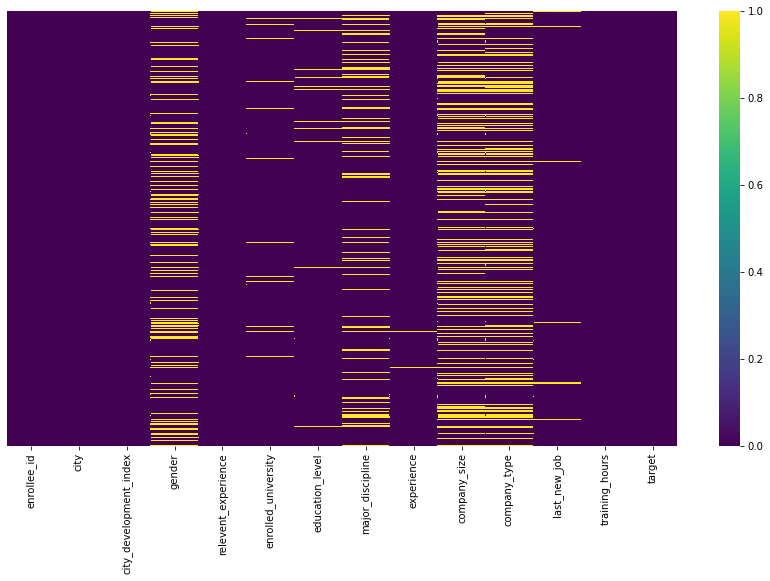

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis') 

In [9]:
df.isnull().mean() # percentage of missing data 

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

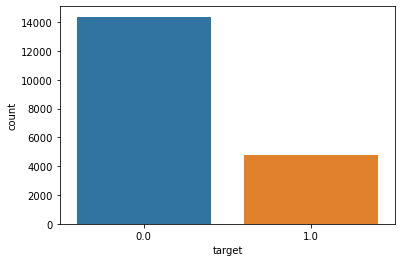

In [10]:
sns.countplot(x='target',data=df) # check countplot of target

<AxesSubplot:xlabel='training_hours', ylabel='education_level'>

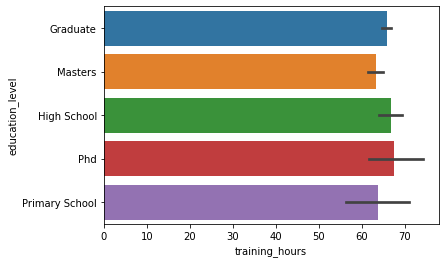

In [11]:
sns.barplot(x='training_hours',y='education_level',data=df)

<AxesSubplot:xlabel='training_hours', ylabel='education_level'>

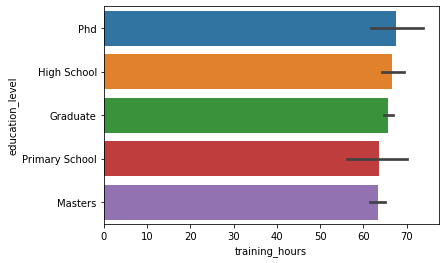

In [12]:
order = df.groupby(["education_level"])["training_hours"].mean().sort_values(ascending=False).index

sns.barplot(x='training_hours',y='education_level',data=df,order=order)

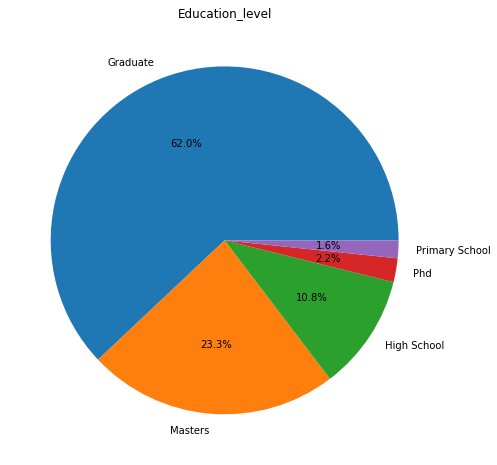

In [13]:
plt.figure(figsize=(12,8))
ax = df['education_level'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.yaxis.set_visible(False)
plt.title('Education_level');

<AxesSubplot:>

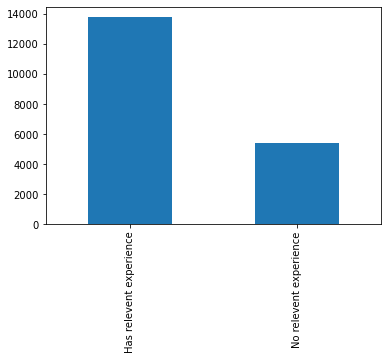

In [14]:
df['relevent_experience'].value_counts().plot.bar()

<AxesSubplot:>

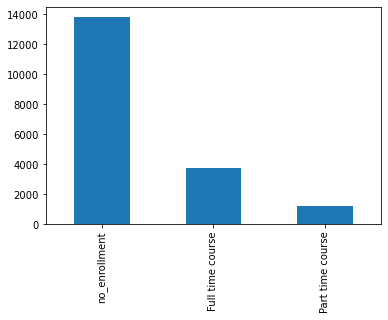

In [15]:
df['enrolled_university'].value_counts().plot.bar()

<AxesSubplot:>

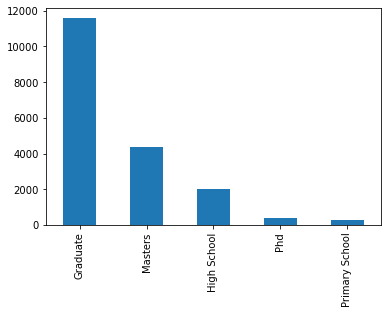

In [16]:
df['education_level'].value_counts().plot.bar()

Text(0.5, 0, '0 - Not looking for job change, 1 – Looking for a job change')

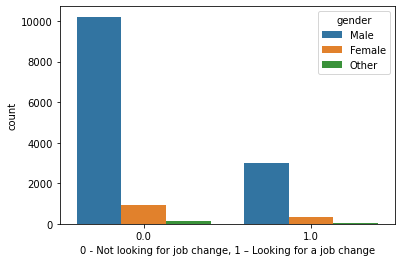

In [17]:
sns.countplot(x='target',data=df,hue='gender')
plt.xlabel('0 - Not looking for job change, 1 – Looking for a job change') 

<AxesSubplot:>

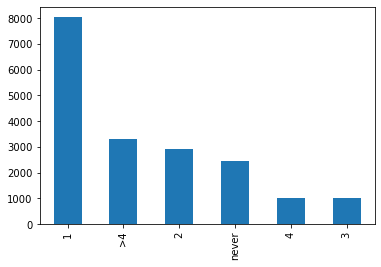

In [18]:
df['last_new_job'].value_counts().plot.bar()

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

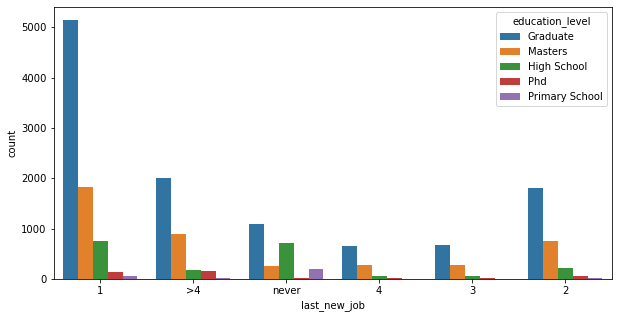

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='last_new_job',data=df,hue='education_level')

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

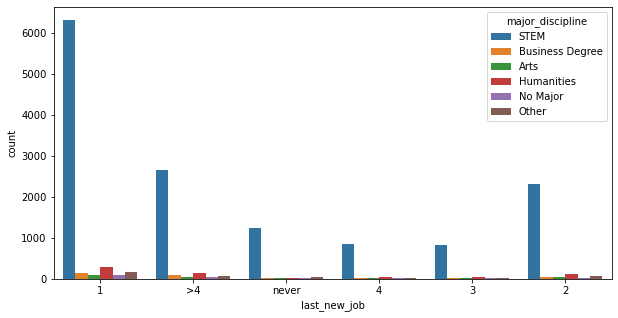

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='last_new_job',data=df,hue='major_discipline')

In [21]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

## Fill missing values 


In [22]:
df_copy = df.copy()

In [23]:
# Check if there's any null non numeric values 
for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

gender
enrolled_university
education_level
major_discipline
experience
company_size
company_type
last_new_job


In [24]:
for label,content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing 
            df_copy[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with missing arbitrary
            df_copy[label] = content.fillna('Missing')




            

<AxesSubplot:>

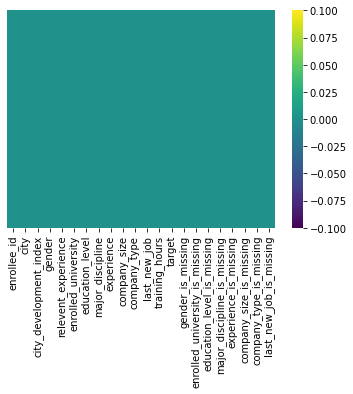

In [25]:
sns.heatmap(df_copy.isnull(),yticklabels=False,cmap='viridis') # check if there are still missing values 

In [26]:
df_copy['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Missing               386
Name: enrolled_university, dtype: int64

## Turning categorical data into dummy or indicator variables 

In [27]:
df_copy.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,target,gender_is_missing,enrolled_university_is_missing,education_level_is_missing,major_discipline_is_missing,experience_is_missing,company_size_is_missing,company_type_is_missing,last_new_job_is_missing
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,...,36,1.0,False,False,False,False,False,True,True,False
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,47,0.0,False,False,False,False,False,False,False,False
2,11561,city_21,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5,Missing,...,83,0.0,True,False,False,False,False,True,True,False
3,33241,city_115,0.789,Missing,No relevent experience,Missing,Graduate,Business Degree,<1,Missing,...,52,1.0,True,True,False,False,False,True,False,False
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,8,0.0,False,False,False,False,False,False,False,False


In [28]:
df_copy['last_new_job'].value_counts()

1          8040
>4         3290
2          2900
never      2452
4          1029
3          1024
Missing     423
Name: last_new_job, dtype: int64

In [29]:
gender = pd.get_dummies(df_copy['gender'],drop_first=True)
relevent_experience = pd.get_dummies(df_copy['relevent_experience'],drop_first=True)
enrolled_university = pd.get_dummies(df_copy['enrolled_university'],drop_first=True)
education_level = pd.get_dummies(df_copy['education_level'],drop_first=True)
major_discipline = pd.get_dummies(df_copy['major_discipline'],drop_first=True)
experience = pd.get_dummies(df_copy['experience'],drop_first=True)
company_size = pd.get_dummies(df_copy['company_size'],drop_first=True)
company_type = pd.get_dummies(df_copy['company_type'],drop_first=True)
last_new_job = pd.get_dummies(df_copy['last_new_job'],drop_first=True) 

In [30]:
final_df = pd.concat([df_copy,gender,relevent_experience,enrolled_university,education_level,major_discipline,
                      experience,company_size,company_type,last_new_job],axis=1)

In [31]:
final_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,Missing,never
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,...,0,0,0,0,0,0,0,0,0,0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0,0,0,1,0,0,0,1,0,0
2,11561,city_21,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5,Missing,...,0,0,0,0,0,0,0,0,0,1
3,33241,city_115,0.789,Missing,No relevent experience,Missing,Graduate,Business Degree,<1,Missing,...,0,0,0,1,0,0,0,0,0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,...,0,0,0,0,0,0,1,0,0,0


In [32]:
final_df.drop(['enrollee_id','city','gender',
               'relevent_experience','enrolled_university',
               'education_level','major_discipline','experience','company_size','company_type',
               'last_new_job'],axis=1,inplace=True)

In [33]:
final_df

,city_development_index,training_hours,target,gender_is_missing,enrolled_university_is_missing,education_level_is_missing,major_discipline_is_missing,experience_is_missing,company_size_is_missing,company_type_is_missing,...,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,Missing,never
0,0.920,36,1.0,False,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0
1,0.776,47,0.0,False,False,False,False,False,False,False,...,0,0,0,1,0,0,0,1,0,0
2,0.624,83,0.0,True,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,1
3,0.789,52,1.0,True,True,False,False,False,True,False,...,0,0,0,1,0,0,0,0,0,1
4,0.767,8,0.0,False,False,False,False,False,False,False,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,42,1.0,False,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0
19154,0.920,52,1.0,False,False,False,False,False,True,True,...,0,0,0,0,0,0,1,0,0,0
19155,0.920,44,0.0,False,False,False,False,False,False,False,...,0,0,0,1,0,0,1,0,0,0
19156,0.802,97,0.0,False,False,False,True,False,False,False,...,0,0,0,1,1,0,0,0,0,0


## Dealing with Imbalanced Data 
### Combination of Over- and Under-sampling/ Hybrid Methods
There are two ready-to-use classes imbalanced-learn implements for combining over- and under-sampling methods are SMOTETomek and SMOTEENN.

In [34]:
X = final_df.drop('target',axis=1) # just the features 
y=final_df['target'] # target

In [35]:
# resample by adding samples to minority class using SMOTE
X_ =np.array(X)
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_oversamp, Y_over_samp = resample.fit_resample(X_, y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_oversamp,
                                                    Y_over_samp,
                                                    test_size=0.3,
                                                    random_state = 42)

In [37]:
X_train.shape , X_test.shape

((20027, 70), (8584, 70))

## Modelling 

In [38]:
# Put models in a dictionary  
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),'Gradient Boosting':GradientBoostingClassifier()}

# create a function to fit and score models 
def fit_and_score(models, X_train,X_test,y_train,y_test):

    # set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores 
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train,y_train)
        # Evaluate the model and apppend its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [39]:
model_scores = fit_and_score(models=models, X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\hi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7567567567567568,
 'KNN': 0.7051491146318732,
 'Random Forest': 0.8592730661696178,
 'Gradient Boosting': 0.8427306616961789}

## Hyperparameter tuning with RandomizedSearchCV


In [42]:
# Create a hyperparameter grid for RandomForestClassifier 
gr= {"n_estimators": np.arange(10, 8000, 50),
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 20, 2)}


clf = RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=1),param_distributions=gr,
                         verbose=2,
                         cv=5,
                         n_iter=20
                        )
clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=3110; total time=  52.8s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=3110; total time=  49.2s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=3110; total time=  48.9s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=3110; total time=  49.7s
[CV] END max_depth=10, min_samples_leaf=7, min_samples_split=16, n_estimators=3110; total time=  50.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=4760; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=4760; total time= 1.4min
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=4760; total time= 1.3min
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=14, n_estimators=4760; total time= 1.3min
[CV] END ma

[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=3360; total time=  44.9s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=3360; total time=  38.6s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=3360; total time=  40.1s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=3360; total time=  35.7s
[CV] END max_depth=5, min_samples_leaf=7, min_samples_split=10, n_estimators=3360; total time=  31.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=7010; total time= 2.1min
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=7010; total time= 2.0min
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=7010; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estimators=7010; total time= 2.0min
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=14, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,  860,  910,  960, 1010, 1060,
       1110, 1160, 1...
       4410, 4460, 4510, 4560, 4610, 4660, 4710, 4760, 4810, 4860, 4910,
       4960, 5010, 5060, 5110, 5160, 5210, 5260, 5310, 5360, 5410, 5460,
       5510, 5560, 5610, 5660, 5710, 5760, 5810, 5860, 5910, 5960, 6010,
       6060, 6110, 6160, 6210, 6260, 6310, 6360, 6410, 6460, 6510, 6560,
       6610, 6660, 6710, 6760, 6810, 6860, 6910, 6960, 7010, 7060, 7110,
       7160, 7210, 7260, 7310, 7360, 7410, 

In [43]:
clf.best_params_

{'n_estimators': 3910,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': None}

In [44]:
clf.score(X_test,y_test)

0.8572926374650512

In [45]:
y_preds = clf.predict(X_test)

In [46]:
precision_score(y_test,y_preds)

0.8453423120089787

In [47]:
recall_score(y_test,y_preds)

0.8754067875406788

In [49]:
print(confusion_matrix(y_test,y_preds))

[[3593  689]
 [ 536 3766]]


In [59]:
grid_p = {"n_estimators": np.arange(10,8000,50),
      "max_depth": [None,3,5,10],
      "min_samples_split": np.arange(2,21,2),
      "min_samples_leaf" : np.arange(1,21,2),
      "max_features": [0.5,1,'sqrt','auto','log2']
       }

In [60]:
# Tune GradientBoostingRegressor 
#%% time 


np.random.seed(42)

# Setup random hyperparametr search for GradientBoostingRegressor 
grid_p = RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=grid_p,
                           cv=5, n_iter=10,verbose=2)


# Fit random hyperparameter search model for GradientBoostingRegressor
grid_p.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=1910; total time=  32.7s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=1910; total time=  38.1s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=1910; total time=  37.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=1910; total time=  33.5s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=13, min_samples_split=6, n_estimators=1910; total time=  32.5s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=7360; total time= 2.1min
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimators=7360; total time= 2.0min
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=16, n_estimat

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]),
                                        'n_estimators': array([  10,   60,  110,  160,  210,  260,  310,  360,  410,  460,  510,
        560,  610,  660,  710,  760,  810,...
       4410, 4460, 4510, 4560, 4610, 4660, 4710, 4760, 4810, 4860, 4910,
       4960, 5010, 5060, 5110, 5160, 5210, 5260, 5310, 5360, 5410, 5460,
       5510, 5560, 5610, 5660, 5710, 5760, 5810, 5860, 5910, 5960, 6010,
       6060, 6110, 6160, 6210, 6260, 6310, 6360, 6410, 6460, 6510, 6560,
       6610, 6660, 6710, 6760, 

In [61]:
grid_p.best_params_

{'n_estimators': 1910,
 'min_samples_split': 6,
 'min_samples_leaf': 13,
 'max_features': 'sqrt',
 'max_depth': 3}

In [62]:
grid_p.score(X_test,y_test)

0.8652143522833178

In [63]:
y_pr = grid_p.predict(X_test)

In [64]:
precision_score(y_test,y_pr)

0.8720132481665483

In [65]:
recall_score(y_test,y_pr)

0.8568107856810786

In [66]:
print(confusion_matrix(y_test,y_preds))

[[3593  689]
 [ 536 3766]]


In [67]:
%%time 

# Most ideal hyperparameters 
ideal_model = GradientBoostingClassifier(n_estimators=1910, 
                                    min_samples_leaf=13,
                                    min_samples_split=6,
                                    max_features='sqrt',
                                    max_depth=3,
                                    random_state=42) # random state so our results are reproducible 

# Fit the ideal model 
ideal_model.fit(X_train,y_train)

Wall time: 12min 3s
Compiler : 139 ms
Parser   : 2.2 s


GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=13,
                           min_samples_split=6, n_estimators=1910,
                           random_state=42)

In [68]:
ideal_model.score(X_test,y_test)

0.8645153774464119

In [69]:
# Helper function for plotting feature importance 
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,"feature_importances":importances})
          .sort_values("feature_importances",ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe 
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

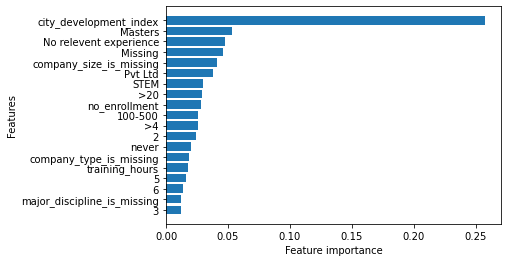

In [70]:
plot_features(X.columns, ideal_model.feature_importances_)